# Webscraping some stock market data and analysing it

This script webscrapes the daily FTSE 100 stocks from London Stock Exchange for the 100 companies and essentially analyses the data collected by answering some questions stated. Additionally, the data is stored in a database such that when the script is run the following day, the data includes yesterday's data as well as the day the script is run. This builds up on the data used to create a time series of the data obtained each day.

The second half of the script is historical data which was downloaded from UK Investing website and like the first half of the script, also analyses the data. However, this dataset is fixed from 2001 to 2021.

## Scraping Daily FTSE 100 Data From London Stock Exchange Website

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import datetime

In [2]:
# get website for the ftse 100
url = 'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page=1'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')

In [3]:
# create empty list to append to
code, name, currency, mc, price, change, p_change = ([] for i in range(7))

In [4]:
# get all data
company_code = soup.find_all(class_=re.compile('clickable bold-font-weight instrument-tidm gtm-trackable td-with-link'))
code.append(company_code[11].text)

company_name = soup.find_all(class_=re.compile('clickable instrument-name gtm-trackable td-with-link'))
name.append(company_name[11].text)

company_currency = soup.find_all(class_=re.compile('instrument-currency hide-on-landscape'))
currency.append(company_currency[11].text)

company_mc = soup.find_all(class_=re.compile('instrument-marketcapitalization hide-on-landscape'))
mc.append(company_mc[11].text)

company_price = soup.find_all(class_=re.compile('instrument-lastprice'))
price.append(company_price[11].text)

company_change = soup.find_all(class_=re.compile('instrument-netchange hide-on-landscape'))
change.append(company_change[11].text)

company_p_change = soup.find_all(class_=re.compile('instrument-percentualchange hide-on-landscape gtm-trackable'))
p_change.append(company_p_change[11].text)

In [5]:
print(code, name, currency, mc, price, change, p_change)

['SMDS'] ['SMITH (DS) PLC ORD 10P'] [' GBX '] [' 4,473.50 '] [' 330.90 '] [' 5.30 '] [' 1.63% ']


In [6]:
# find out how many pages to iterate over
list_of_pages = soup.find_all('a', class_='page-number')
print(len(list_of_pages))

5


In [7]:
# get link of website
links = []

list_of_links = soup.find_all('a')

# there are 20 relevant links on a page which is covered within this range
for link in list_of_links[200:240:2]:
    if code[0] in link:
        x = link.get('href')
        url = f'https://www.londonstockexchange.com/{x}'
        print(url)
        links.append(url)

https://www.londonstockexchange.com/stock/SMDS/smith-ds-plc


In [8]:
links

['https://www.londonstockexchange.com/stock/SMDS/smith-ds-plc']

In [9]:
# go on link and scrape details needed
website = requests.get(links[0]).text
soup = BeautifulSoup(website, 'lxml')

In [10]:
# new variables to scrape
volume, turnover, eps, issue_date, date = ([] for i in range(5))

company_volume = soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
volume.append(company_volume)

company_turnover = soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[3].text.split(' ')[-1]
turnover.append(company_turnover)

company_eps = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
company_issue_date = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[3].text.split(' ')[3:]

# eps sometimes switches with issue date
title_eps = soup.select('#chart-table > div.chart-table-instrument-information > div.flex-wrapper > app-index-item:nth-child(4) > span')[0]

if title_eps.text == ' Issue date ':
    eps.append(company_eps)
    company_issue_date = ' '.join(company_issue_date)
    issue_date.append(company_issue_date)
else:
    company_eps = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[1].text.split(' ')[-1]
    eps.append(company_eps)
    
    company_issue_date = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[2].text.split(' ')[3:]
    company_issue_date = ' '.join(company_issue_date)
    issue_date.append(company_issue_date)
    

date_of_stock_data = soup.select('#ticker > div > div > div.flex-wrapper.ticker-fields > div.ticker-item.delay > div > .bold-font-weight')
for x in date_of_stock_data:
    date.append(x.text)

In [11]:
print(volume, turnover, eps, issue_date, date)

['4,629,157'] ['£11,799,048.71'] ['0.14'] ['31 October 2003'] ['02.05.22 15:24:20']


#### Now that the process of scraping everything from one company is set, loop through each card on each page and collect everything

In [12]:
# create empty list to append to
code, name, currency, mc, price, change, p_change = ([] for i in range(7))

# get link of website
links = []

# new variables to scrape
volume, turnover, eps, issue_date, date = ([] for i in range(5))

page = 1

In [13]:
while page < 6:
    for card in range(20):
        # step 1
        url = f'https://www.londonstockexchange.com/indices/ftse-100/constituents/table?page={page}'
        website = requests.get(url).text
        soup = BeautifulSoup(website, 'lxml')

        company_code = soup.find_all(class_=re.compile('clickable bold-font-weight instrument-tidm gtm-trackable td-with-link'))
        code.append(company_code[card].text)

        company_name = soup.find_all(class_=re.compile('clickable instrument-name gtm-trackable td-with-link'))
        name.append(company_name[card].text)

        company_currency = soup.find_all(class_=re.compile('instrument-currency hide-on-landscape'))
        currency.append(company_currency[card].text)

        company_mc = soup.find_all(class_=re.compile('instrument-marketcapitalization hide-on-landscape'))
        mc.append(company_mc[card].text)

        company_price = soup.find_all(class_=re.compile('instrument-lastprice'))
        price.append(company_price[card].text)

        company_change = soup.find_all(class_=re.compile('instrument-netchange hide-on-landscape'))
        change.append(company_change[card].text)

        company_p_change = soup.find_all(class_=re.compile('instrument-percentualchange hide-on-landscape gtm-trackable'))
        p_change.append(company_p_change[card].text)

        # step 2
        list_of_links = soup.find_all('a')

        for link in list_of_links[200:240:2]:
            if code[-1] in link:
                x = link.get('href')
                url = f'https://www.londonstockexchange.com/{x}'
                links.append(url)

        # step 3
        website = requests.get(links[-1]).text
        soup = BeautifulSoup(website, 'lxml')

        company_volume = soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
        volume.append(company_volume)

        company_turnover = soup.select('#chart-table > div:nth-child(1) > div:nth-child(2) > .index-item')[3].text.split(' ')[-1]
        turnover.append(company_turnover)

        company_eps = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[2].text.split(' ')[-1]
        company_issue_date = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[3].text.split(' ')[3:]

        # eps sometimes switches with issue date
        title_eps = soup.select('#chart-table > div.chart-table-instrument-information > div.flex-wrapper > app-index-item:nth-child(4) > span')[0]

        if title_eps.text == ' Issue date ':
            eps.append(company_eps)
            company_issue_date = ' '.join(company_issue_date)
            issue_date.append(company_issue_date)
        else:
            company_eps = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[1].text.split(' ')[-1]
            eps.append(company_eps)

            company_issue_date = soup.select('#chart-table > div:nth-child(3) > div:nth-child(2) > .index-item')[2].text.split(' ')[3:]
            company_issue_date = ' '.join(company_issue_date)
            issue_date.append(company_issue_date)


        date_of_stock_data = soup.select('#ticker > div > div > div.flex-wrapper.ticker-fields > div.ticker-item.delay > div > .bold-font-weight')
        for x in date_of_stock_data:
            date.append(x.text)
            
    page += 1

In [14]:
print(len(code), len(name), len(currency), len(mc), len(price), len(change), len(p_change))
print(len(volume), len(turnover), len(eps), len(issue_date), len(date))

100 100 100 100 100 100 100
100 100 100 100 100


In [15]:
links

['https://www.londonstockexchange.com/stock/AVV/aveva-group-plc',
 'https://www.londonstockexchange.com/stock/SKG/smurfit-kappa-group-plc',
 'https://www.londonstockexchange.com/stock/AAL/anglo-american-plc',
 'https://www.londonstockexchange.com/stock/MNDI/mondi-plc',
 'https://www.londonstockexchange.com/stock/SMT/scottish-mortgage-investment-trust-plc',
 'https://www.londonstockexchange.com/stock/GLEN/glencore-plc',
 'https://www.londonstockexchange.com/stock/SBRY/sainsbury-j-plc',
 'https://www.londonstockexchange.com/stock/PSON/pearson-plc',
 'https://www.londonstockexchange.com/stock/ENT/entain-plc',
 'https://www.londonstockexchange.com/stock/DPH/dechra-pharmaceuticals-plc',
 'https://www.londonstockexchange.com/stock/BLND/british-land-company-plc',
 'https://www.londonstockexchange.com/stock/SMDS/smith-ds-plc',
 'https://www.londonstockexchange.com/stock/STJ/st-james-s-place-plc',
 'https://www.londonstockexchange.com/stock/ICP/intermediate-capital-group-plc',
 'https://www.lon

#### Move lists to dataframe

In [16]:
import pandas as pd

In [17]:
d = {'Date':date, 'Code':code, 'Company Name':name, 'Currency': currency, 'Market Cap (million)': mc, 'Price': price, 'Change':change, 'Percentage Change':p_change, 'Volume':volume, 'Turnover':turnover, 'Earnings Per Share':eps, 'Issue Date':issue_date }

In [79]:
df = pd.DataFrame(d)

In [80]:
# Clean data
df['Percentage Change'] = df['Percentage Change'].str.replace('%','')
df['Turnover'] = df['Turnover'].str.replace('£','')
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%d-%m')

In [81]:
df['Date'].dtype

dtype('<M8[ns]')

In [82]:
# Remove the '-' from the change and p change column
df['Change'] = df['Change'].replace([' - '],'0')
df['Percentage Change'] = df['Percentage Change'].replace([' - '],'0')

In [83]:
# the negative signs in earnings per share causing problems with conversion to float
import numpy as np

df['Earnings Per Share'] = df['Earnings Per Share'].replace('-',np.nan)

In [84]:
# Change datatype of all strings that look like numbers to actual numbers
df[['Market Cap (million)', 'Price', 'Change', 'Percentage Change', 'Volume', 'Turnover', 'Earnings Per Share']] = df[['Market Cap (million)', 'Price', 'Change', 'Percentage Change', 'Volume', 'Turnover', 'Earnings Per Share']].apply(lambda x: x.str.replace(',','').astype(float))
df.head(5)

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date
0,2022-05-02,AVV,AVEVA GROUP PLC ORD 3 5/9P,GBX,6195.31,2175.0,121.0,5.89,1233439.0,1.681306e+07,0.11,15 July 2013
1,2022-05-02,SKG,SMURFIT KAPPA GROUP PLC ORD EUR0.001 (CDI),GBX,8511.45,3413.0,142.0,4.34,739793.0,1.363790e+07,2.28,01 March 2016
2,2022-05-02,AAL,ANGLO AMERICAN PLC ORD USD0.54945,GBX,46193.25,3586.0,132.5,3.84,4026736.0,1.043858e+08,1.69,02 July 2007
3,2022-05-02,MNDI,MONDI PLC ORD EUR 0.20,GBX,7093.94,1510.0,49.0,3.35,1887872.0,2.451676e+07,1.20,02 July 2007
4,2022-05-02,SMT,SCOTTISH MORTGAGE INV TST PLC ORD 5P,GBX,12797.18,914.0,27.8,3.14,2262200.0,1.111940e+07,6.33,30 June 2014


In [85]:
# Create new columns
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [86]:
# change issue date to datetime format
df['Issue Date'] = pd.to_datetime(df['Issue Date'])

In [87]:
daily_FTSE = df
daily_FTSE.head()

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,2022-05-02,AVV,AVEVA GROUP PLC ORD 3 5/9P,GBX,6195.31,2175.0,121.0,5.89,1233439.0,1.681306e+07,0.11,2013-07-15,2,5,2022
1,2022-05-02,SKG,SMURFIT KAPPA GROUP PLC ORD EUR0.001 (CDI),GBX,8511.45,3413.0,142.0,4.34,739793.0,1.363790e+07,2.28,2016-03-01,2,5,2022
2,2022-05-02,AAL,ANGLO AMERICAN PLC ORD USD0.54945,GBX,46193.25,3586.0,132.5,3.84,4026736.0,1.043858e+08,1.69,2007-07-02,2,5,2022
3,2022-05-02,MNDI,MONDI PLC ORD EUR 0.20,GBX,7093.94,1510.0,49.0,3.35,1887872.0,2.451676e+07,1.20,2007-07-02,2,5,2022
4,2022-05-02,SMT,SCOTTISH MORTGAGE INV TST PLC ORD 5P,GBX,12797.18,914.0,27.8,3.14,2262200.0,1.111940e+07,6.33,2014-06-30,2,5,2022


In [88]:
# get the name without the codes at the end
def rename(link):
    semi_cleaned_name = link[45:]
    x = semi_cleaned_name.find('/') + 1
    cleaned_name = semi_cleaned_name[x:].replace('-', ' ').title()
    return cleaned_name

In [89]:
pd.DataFrame([rename(x) for x in links])

,0
0,Aveva Group Plc
1,Smurfit Kappa Group Plc
2,Anglo American Plc
3,Mondi Plc
4,Scottish Mortgage Investment Trust Plc
...,...
95,Hargreaves Lansdown Plc
96,Natwest Group Plc
97,National Grid Plc
98,Vodafone Group Plc


In [90]:
daily_FTSE['Company Name'] = pd.DataFrame([rename(x) for x in links])
daily_FTSE.head(5)

,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,2022-05-02,AVV,Aveva Group Plc,GBX,6195.31,2175.0,121.0,5.89,1233439.0,1.681306e+07,0.11,2013-07-15,2,5,2022
1,2022-05-02,SKG,Smurfit Kappa Group Plc,GBX,8511.45,3413.0,142.0,4.34,739793.0,1.363790e+07,2.28,2016-03-01,2,5,2022
2,2022-05-02,AAL,Anglo American Plc,GBX,46193.25,3586.0,132.5,3.84,4026736.0,1.043858e+08,1.69,2007-07-02,2,5,2022
3,2022-05-02,MNDI,Mondi Plc,GBX,7093.94,1510.0,49.0,3.35,1887872.0,2.451676e+07,1.20,2007-07-02,2,5,2022
4,2022-05-02,SMT,Scottish Mortgage Investment Trust Plc,GBX,12797.18,914.0,27.8,3.14,2262200.0,1.111940e+07,6.33,2014-06-30,2,5,2022


### Use this daily data to do  analysis as well as build a database of each day by inputting this dataset into SQL which will update everyday and can be used to create a time series of the daily data

In [91]:
import pyodbc # sql
from sqlalchemy import create_engine # sql to insert df to sql
import urllib # for sql too

SERVER_NAME = 'DESKTOP-GR6T3L7'
DATABASE_NAME = 'stocks'

# connection string
conn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER=' + SERVER_NAME + '; \
                       DATABASE=' + DATABASE_NAME + '; \
                       Trusted_Connection=yes')

# cursor to extract data
cursor = conn.cursor()

# Use this to connect for saving data
quoted = urllib.parse.quote_plus('DRIVER={ODBC Driver 17 for SQL Server}; \
                       SERVER='+SERVER_NAME+'; \
                       DATABASE='+DATABASE_NAME+'; \
                       Trusted_Connection=yes')

In [93]:
# save the dataset into SQL database
engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))
daily_FTSE.to_sql('daily_FTSE', schema='dbo', con=engine, if_exists='append')
print('Dataset appended.')

##### Use SQL dataset to analyse

In [94]:
query = """SELECT * FROM [dbo].[daily_FTSE]"""
result = pd.read_sql(query, conn)
result

,index,Date,Code,Company Name,Currency,Market Cap (million),Price,Change,Percentage Change,Volume,Turnover,Earnings Per Share,Issue Date,Day,Month,Year
0,0,2022-04-22,RTO,Rentokil Initial Plc,GBX,9766.48,535.20,11.2,2.14,2376926.0,1.101138e+07,0.10,2006-09-18,22,4,2022
1,1,2022-04-22,EDV,Endeavour Mining Plc,GBX,4999.01,2054.00,42.0,2.09,108778.0,2.132557e+06,0.53,2021-06-14,22,4,2022
2,2,2022-04-22,ITRK,Intertek Group Plc,GBX,8169.72,5150.00,88.0,1.74,107922.0,4.797284e+06,1.54,2003-10-31,22,4,2022
3,3,2022-04-22,NG.,National Grid Plc,GBX,42372.46,1176.50,14.0,1.20,3410009.0,1.571544e+07,0.47,2017-05-22,22,4,2022
4,4,2022-04-22,AVV,Aveva Group Plc,GBX,7603.88,2549.00,28.0,1.11,190779.0,4.058587e+06,0.11,2013-07-15,22,4,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,95,2022-05-02,HL.,Hargreaves Lansdown Plc,GBX,4446.26,917.20,-20.2,-2.16,2309682.0,1.604776e+07,0.63,2007-05-15,2,5,2022
896,96,2022-05-02,NWG,Natwest Group Plc,GBX,23552.97,218.00,-4.9,-2.20,34632135.0,5.566068e+07,0.25,2012-06-06,2,5,2022
897,97,2022-05-02,NG.,National Grid Plc,GBX,44668.78,1194.00,-31.5,-2.57,8773441.0,8.530715e+07,0.47,2017-05-22,2,5,2022
898,98,2022-05-02,VOD,Vodafone Group Plc,GBX,35902.96,121.54,-5.5,-4.33,137289012.0,1.117234e+08,0.00,2014-02-24,2,5,2022


In [95]:
# close cursor and remove conn
cursor.close()
conn.close()

### Analysis

##### What are the top five companies by market cap today

In [96]:
# to make sure to filter today
today = pd.Timestamp.today().strftime('%Y-%m-%d')
today

'2022-05-02'

In [97]:
top_5_mc = result.pivot_table('Market Cap (million)', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Market Cap (million)'], ascending=[False]).reset_index()
top_5_mc = top_5_mc[top_5_mc['Date'] == today].head(5)

In [98]:
top_5_mc

,Company Name,Date,Market Cap (million)
5,Shell Plc,2022-05-02,164212.82
6,Astrazeneca Plc,2022-05-02,163653.31
19,Hsbc Holdings Plc,2022-05-02,99425.82
26,Unilever Plc,2022-05-02,94041.35
33,Glaxosmithkline Plc,2022-05-02,92038.89


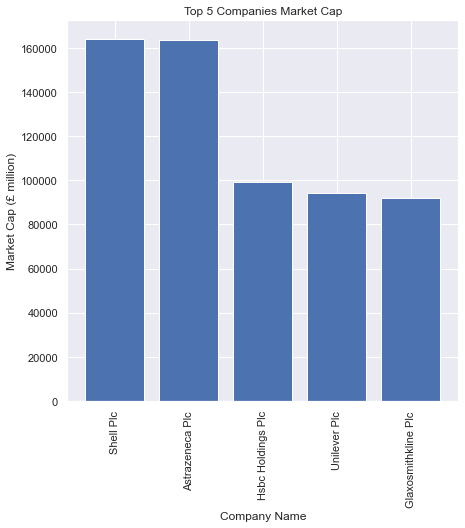

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn theme
sns.set_theme()

# plot a bar chart
plt.figure(figsize=(7,7))

mc_x = top_5_mc['Company Name']
mc_y = top_5_mc['Market Cap (million)']

plt.xlabel('Company Name')
plt.ylabel('Market Cap (£ million)')
plt.title('Top 5 Companies Market Cap')

plt.xticks(rotation=90)

plt.bar(mc_x, mc_y)
plt.show()

##### Daily price chart for the top 5 market cap companies today

In [100]:
# 5 companies that are top market cap today
top_5_mc['Company Name']

5               Shell Plc
6         Astrazeneca Plc
19      Hsbc Holdings Plc
26           Unilever Plc
33    Glaxosmithkline Plc
Name: Company Name, dtype: object

In [101]:
daily_chart = result[['Date', 'Company Name', 'Price']]
daily_chart = daily_chart[daily_chart['Company Name'].isin(top_5_mc['Company Name'])].reset_index()
daily_chart.drop("index", axis=1, inplace=True)
daily_chart

,Date,Company Name,Price
0,2022-04-22,Unilever Plc,3550.50
1,2022-04-22,Glaxosmithkline Plc,1745.80
2,2022-04-22,Shell Plc,2204.50
3,2022-04-22,Astrazeneca Plc,10312.00
4,2022-04-22,Hsbc Holdings Plc,523.80
5,2022-04-26,Shell Plc,2105.00
6,2022-04-26,Astrazeneca Plc,10372.00
7,2022-04-26,Unilever Plc,3650.00
8,2022-04-26,Glaxosmithkline Plc,1753.80
9,2022-04-28,Shell Plc,2171.50


In [102]:
# pivot data to plot by company by tranposing data
daily_plot = daily_chart.pivot_table('Price', 'Date' , ['Company Name'])
daily_plot

Company Name,Astrazeneca Plc,Glaxosmithkline Plc,Hsbc Holdings Plc,Shell Plc,Unilever Plc
Date,,,,,
2022-01-05,10688.0,1797.0,501.30,2173.0,3719.0
2022-02-05,10688.0,1797.0,501.30,2173.0,3719.0
2022-04-22,10312.0,1745.8,523.80,2204.5,3550.5
2022-04-26,10372.0,1753.8,477.80,2105.0,3650.0
2022-04-27,10574.0,1795.4,485.95,NaN,3574.0
2022-04-28,10631.0,1811.0,491.35,2171.5,3639.5
2022-04-29,10694.0,1796.0,492.90,2178.0,3702.0
2022-04-30,10688.0,1797.0,501.30,2173.0,3719.0
2022-05-02,10688.0,1797.0,501.30,2173.0,3719.0


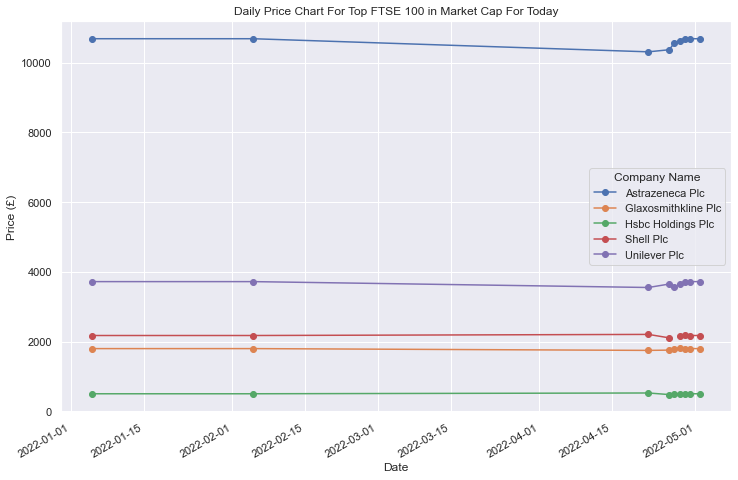

In [103]:
# data will become more populated as days pass
from matplotlib import rcParams

# make it bigger
rcParams['figure.figsize'] = 12,8

# plot
daily_plot.plot(marker='o')

# labelling
plt.title('Daily Price Chart For Top FTSE 100 in Market Cap For Today')
plt.xlabel('Date')
plt.ylabel("Price (£)")
plt.show()

From the future: Could potentially be a problem with this chart. Should have done a fixed top 5 companies for comparison, but oh well, let it run.

##### What companies have the highest turnover on the 22th of April 2022

In [104]:
turnover_pivot = result.pivot_table('Turnover', index=['Company Name', 'Date'], aggfunc='max').sort_values(by=['Turnover'], ascending=[False]).reset_index()
top_5_turnover_may_18_22 = turnover_pivot[turnover_pivot['Date'] == '2022-04-22'].head(5)
top_5_turnover_may_18_22

,Company Name,Date,Turnover
25,Shell Plc,2022-04-22,1.427320e+08
50,Astrazeneca Plc,2022-04-22,9.907548e+07
65,Anglo American Plc,2022-04-22,8.440224e+07
84,Glencore Plc,2022-04-22,6.668124e+07
91,Rio Tinto Plc,2022-04-22,6.356804e+07


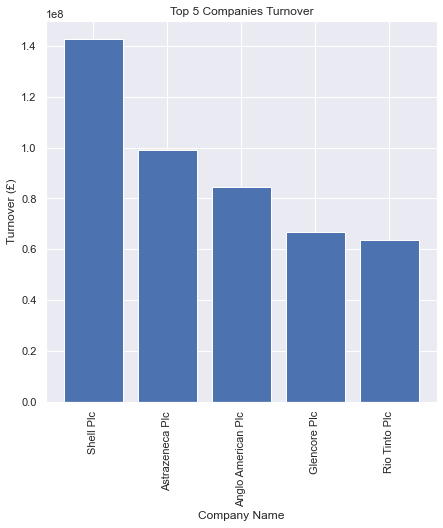

In [105]:
# plot a bar chart
plt.figure(figsize=(7,7))

turnover_x = top_5_turnover_may_18_22['Company Name']
turnover_y = top_5_turnover_may_18_22['Turnover']

plt.xlabel('Company Name')
plt.ylabel('Turnover (£)')
plt.title('Top 5 Companies Turnover')

plt.xticks(rotation=90)

plt.bar(turnover_x, turnover_y)
plt.show()

##### What companies saw the biggest percentage change (positive and negative) today

In [106]:
# plot box plot to show better representation
pchange_box = result.pivot_table('Percentage Change', index=['Company Name', 'Date']).sort_values(by='Percentage Change', ascending=False).reset_index()
pchange_box = pchange_box[pchange_box['Date'] == today]
pchange_box

,Company Name,Date,Percentage Change
4,Aveva Group Plc,2022-05-02,5.89
10,Smurfit Kappa Group Plc,2022-05-02,4.34
14,Anglo American Plc,2022-05-02,3.84
27,Mondi Plc,2022-05-02,3.35
35,Scottish Mortgage Investment Trust Plc,2022-05-02,3.14
...,...,...,...
816,Hargreaves Lansdown Plc,2022-05-02,-2.16
822,Natwest Group Plc,2022-05-02,-2.20
841,National Grid Plc,2022-05-02,-2.57
865,Vodafone Group Plc,2022-05-02,-4.33


In [107]:
highest = pchange_box['Percentage Change'].max()
print(highest)
lowest = pchange_box['Percentage Change'].min()
print(lowest)

5.89
-7.17


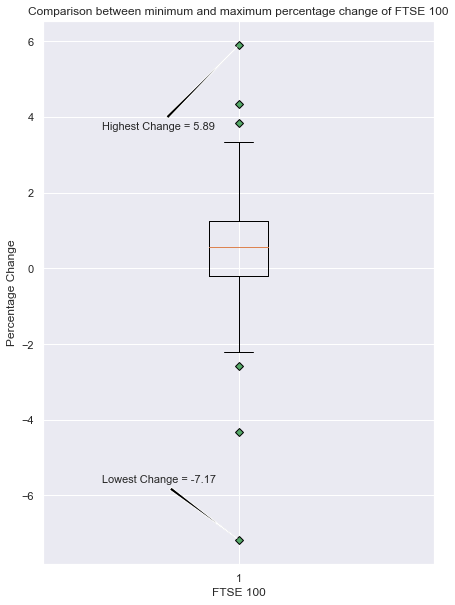

In [108]:
# plot box

# change outliers
green_diamond = dict(markerfacecolor='g', marker='D')

fig3, ax3 = plt.subplots(figsize=(7,10))
ax3.boxplot(pchange_box['Percentage Change'], flierprops=green_diamond)

ax3.set_title('Comparison between minimum and maximum percentage change of FTSE 100')
ax3.set_xlabel('FTSE 100')
ax3.set_ylabel('Percentage Change')

# annotate 
ax3.annotate(
    f'Lowest Change = {lowest}',
    (1, lowest),
    xytext=(0.15, 0.15),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=11)
ax3.annotate(
    f'Highest Change = {highest}',
    (1, highest),
    xytext=(0.15, 0.8),
    textcoords='axes fraction',
    arrowprops=dict(facecolor='black', arrowstyle='wedge'),
    fontsize=11)

plt.show()

# plt.annotate(player[0], (player[1], player[2]), (22+index,0.6+index/15),arrowprops={"arrowstyle":"wedge", "color":'black'})

##### What is the all time mean volume of FTSE 100

In [109]:
mean_volume = round(result['Volume'].mean())
mean_volume = f"{mean_volume:,}"
mean_volume_df = pd.DataFrame({'FTSE Mean Volume': [mean_volume]})
mean_volume_df

,FTSE Mean Volume
0,"7,739,133"


##### What company was issued the latest and has the highest market cap today

In [110]:
latest_company = result[['Date', 'Company Name', 'Issue Date', 'Market Cap (million)']]
latest_company = latest_company.sort_values(by=['Issue Date', 'Market Cap (million)'], ascending=[False,False]).reset_index()
latest_company = latest_company[latest_company['Date'] == today].head(5)
latest_company

,index,Date,Company Name,Issue Date,Market Cap (million)
5,880,2022-05-02,Shell Plc,2022-01-31,164212.82
15,867,2022-05-02,Jd Sports Fashion Plc,2021-11-30,6878.37
24,838,2022-05-02,Berkeley Group Holdings The Plc,2021-09-06,4514.40
31,817,2022-05-02,Melrose Industries Plc,2021-08-31,5091.69
42,815,2022-05-02,Endeavour Mining Plc,2021-06-14,4798.34


##### Compare the top company to the next 4 companies

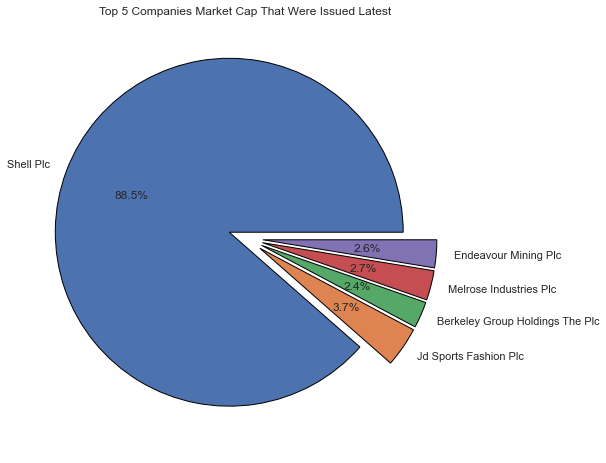

In [111]:
# explode.. make pie chart apart
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

# plot a bar chart
plt.figure(figsize=(8,8))

# bar chart
plt.pie(latest_company['Market Cap (million)'], labels=latest_company['Company Name'], autopct='%1.1f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

# title
plt.title('Top 5 Companies Market Cap That Were Issued Latest')
plt.ticklabel_format(style='plain', axis='y')

##### What company has the highest turnover as well as positive earnings per share  today

In [112]:
turnover_eps = result[['Date', 'Company Name', 'Turnover', 'Earnings Per Share']]
turnover_eps_1 = turnover_eps[(turnover_eps['Earnings Per Share'] > 0) & (turnover_eps['Date'] == today)].sort_values(by=['Turnover', 'Earnings Per Share'], ascending=[False,False]).reset_index()
turnover_eps_1.head(5)

,index,Date,Company Name,Turnover,Earnings Per Share
0,880,2022-05-02,Shell Plc,2.872514e+08,2.59
1,829,2022-05-02,Astrazeneca Plc,2.093614e+08,0.08
2,884,2022-05-02,Glaxosmithkline Plc,1.656479e+08,0.88
3,828,2022-05-02,Unilever Plc,1.599376e+08,2.33
4,814,2022-05-02,Hsbc Holdings Plc,1.533763e+08,0.62


#### What company has the highest product of turnover and earnings per share today

In [113]:
turnover_eps['Turnover * EPS'] = turnover_eps['Turnover'] * turnover_eps['Earnings Per Share']
turnover_eps_2 = turnover_eps[turnover_eps['Date'] == today]
turnover_eps_2 = turnover_eps_2.sort_values(by='Turnover * EPS', ascending=False)
turnover_eps_2 = turnover_eps_2.head(5)
turnover_eps_2

<ipython-input-113-839af2414ee4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  turnover_eps['Turnover * EPS'] = turnover_eps['Turnover'] * turnover_eps['Earnings Per Share']


,Date,Company Name,Turnover,Earnings Per Share,Turnover * EPS
855,2022-05-02,Prudential Plc,5.789878e+07,81.60,4.724541e+09
818,2022-05-02,Rio Tinto Plc,1.181994e+08,13.03,1.540139e+09
880,2022-05-02,Shell Plc,2.872514e+08,2.59,7.439811e+08
828,2022-05-02,Unilever Plc,1.599376e+08,2.33,3.726545e+08
848,2022-05-02,Ferguson Plc,4.519245e+07,6.75,3.050491e+08


##### Compare the top company to the next 4 companies

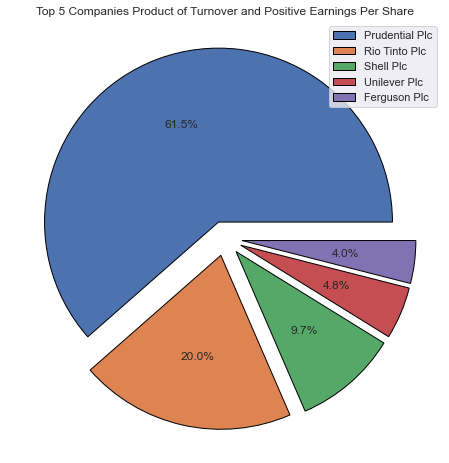

In [114]:
# explode.. make pie chart apart
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

# plot a bar chart
plt.figure(figsize=(8,8))

# bar chart
plt.pie(turnover_eps_2['Turnover * EPS'], autopct='%1.1f%%', explode=explode, wedgeprops={'edgecolor': 'black'})

# title
plt.title('Top 5 Companies Product of Turnover and Positive Earnings Per Share')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(turnover_eps_2['Company Name'])
plt.show()

## Historical FTSE 100 Analysis From UK Investing Website

###  Load data in

In [115]:
historical = pd.read_csv(r"C:\Users\Abdulkadir\Documents\Programming\Personal\DataScience\historicalftse100.csv")
historical

,Date,Price,Open,High,Low,Vol.,Change %
0,"Oct 15, 2020","5,832.52","5,935.06","5,935.06","5,786.20",665.02M,-1.73%
1,"Oct 14, 2020","5,935.06","5,969.71","6,009.81","5,926.49",612.91M,-0.58%
2,"Oct 13, 2020","5,969.71","6,001.38","6,008.04","5,949.97",786.88M,-0.53%
3,"Oct 12, 2020","6,001.38","6,016.65","6,037.08","5,995.11",600.96M,-0.25%
4,"Oct 09, 2020","6,016.65","5,978.03","6,040.47","5,978.03",676.78M,0.65%
...,...,...,...,...,...,...,...
4994,"Jan 09, 2001","6,088.10","6,149.60","6,195.90","6,066.40",-,-1.00%
4995,"Jan 08, 2001","6,149.60","6,198.10","6,212.40","6,137.70",-,-0.78%
4996,"Jan 05, 2001","6,198.10","6,185.60","6,239.60","6,155.00",-,0.20%
4997,"Jan 04, 2001","6,185.60","6,039.90","6,195.30","6,039.90",-,2.41%


### Clean data

In [116]:
# change date to datetime
historical['Date'] = pd.to_datetime(historical['Date'])

In [117]:
# make new columns for month and year
historical['Month'] = historical['Date'].dt.month
historical['Year'] = historical['Date'].dt.year

####  remove M and B from vol and make it to a number

In [118]:
def converter(x):
    if 'M' in x:
        return f"{(float(x.strip('M'))*1000000):,.2f}"
    elif 'B' in x:
        return f"{(float(x.strip('B'))*1000000000):,.2f}"

In [119]:
# remove M and B from vol and make it to a number
historical['Vol.'] = historical['Vol.'].apply(lambda x: converter(x))

In [120]:
historical.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,"5,832.52","5,935.06","5,935.06","5,786.20","665,020,000.00",-1.73%,10,2020
1,2020-10-14,"5,935.06","5,969.71","6,009.81","5,926.49","612,910,000.00",-0.58%,10,2020
2,2020-10-13,"5,969.71","6,001.38","6,008.04","5,949.97","786,880,000.00",-0.53%,10,2020
3,2020-10-12,"6,001.38","6,016.65","6,037.08","5,995.11","600,960,000.00",-0.25%,10,2020
4,2020-10-09,"6,016.65","5,978.03","6,040.47","5,978.03","676,780,000.00",0.65%,10,2020


##### remove percentage signs

In [121]:
historical['Change %'] = historical['Change %'].str.strip('%')

In [122]:
historical.head()

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,"5,832.52","5,935.06","5,935.06","5,786.20","665,020,000.00",-1.73,10,2020
1,2020-10-14,"5,935.06","5,969.71","6,009.81","5,926.49","612,910,000.00",-0.58,10,2020
2,2020-10-13,"5,969.71","6,001.38","6,008.04","5,949.97","786,880,000.00",-0.53,10,2020
3,2020-10-12,"6,001.38","6,016.65","6,037.08","5,995.11","600,960,000.00",-0.25,10,2020
4,2020-10-09,"6,016.65","5,978.03","6,040.47","5,978.03","676,780,000.00",0.65,10,2020


##### Change string to floats

In [123]:
historical_FTSE = historical

In [124]:
# the negative signs in earnings per share causing problems with conversion to float
historical_FTSE['Change %'] = historical_FTSE['Change %'].replace('-',np.nan)

In [125]:
# Change datatype of all strings that look like numbers to actual numbers
historical_FTSE[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']] = historical_FTSE[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']].apply(lambda x: x.str.replace(',','').astype(float))
historical_FTSE

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,5832.52,5935.06,5935.06,5786.20,665020000.0,-1.73,10,2020
1,2020-10-14,5935.06,5969.71,6009.81,5926.49,612910000.0,-0.58,10,2020
2,2020-10-13,5969.71,6001.38,6008.04,5949.97,786880000.0,-0.53,10,2020
3,2020-10-12,6001.38,6016.65,6037.08,5995.11,600960000.0,-0.25,10,2020
4,2020-10-09,6016.65,5978.03,6040.47,5978.03,676780000.0,0.65,10,2020
...,...,...,...,...,...,...,...,...,...
4994,2001-01-09,6088.10,6149.60,6195.90,6066.40,NaN,-1.00,1,2001
4995,2001-01-08,6149.60,6198.10,6212.40,6137.70,NaN,-0.78,1,2001
4996,2001-01-05,6198.10,6185.60,6239.60,6155.00,NaN,0.20,1,2001
4997,2001-01-04,6185.60,6039.90,6195.30,6039.90,NaN,2.41,1,2001


### Analysis

#### Yearly price chart

In [126]:
historical_yearly = historical_FTSE.pivot_table('Price', index=['Date'])

In [127]:
# plot maximum price value
max_val = historical_yearly.sort_values('Price', ascending=False).reset_index().head(1)
max_val

,Date,Price
0,2018-05-22,7877.45


In [128]:
max_y1 = max_val['Price'][0]
max_x1 = max_val['Date'][0]

In [129]:
print(f'{max_x1}, {max_y1}')

2018-05-22 00:00:00, 7877.45


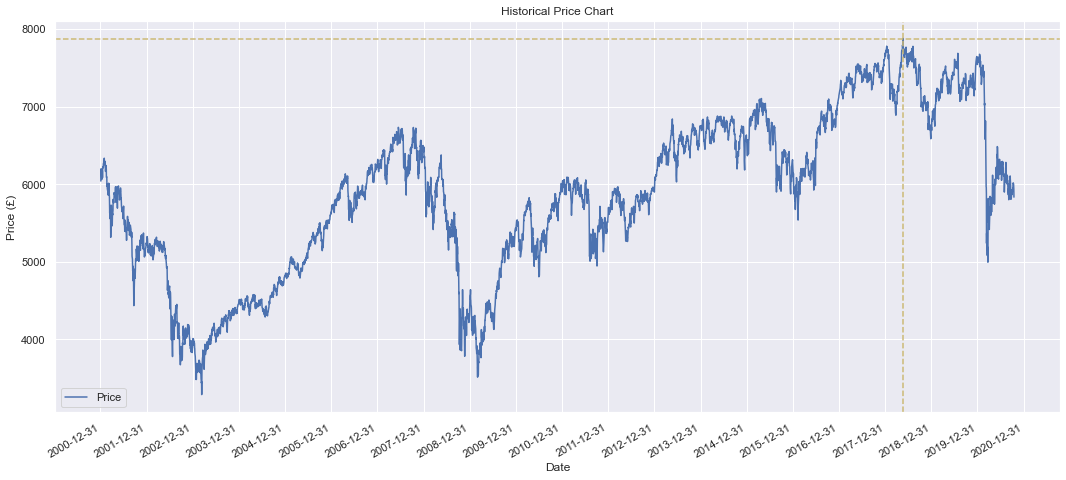

In [130]:
# make it bigger
rcParams['figure.figsize'] = 18,8

# plot
historical_yearly.plot()

# labelling
plt.title('Historical Price Chart')
plt.xlabel('Date')
plt.ylabel("Price (£)")

# x ticks
date_day = pd.date_range(start='2000-01-01', end='2021-10-15', freq='Y')
plt.xticks(date_day)

# horizontal and vertical line
plt.axhline(y=max_val['Price'][0], color='y', linestyle='--')
plt.axvline(x=max_val['Date'][0], color='y', linestyle='--')

# plot max val xticks


plt.show()

#### Volume Chart

In [131]:
# find out when the NaN stops
no_NaN = historical_FTSE[historical_FTSE['Vol.'].notnull()]
no_NaN

,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,2020-10-15,5832.52,5935.06,5935.06,5786.20,6.650200e+08,-1.73,10,2020
1,2020-10-14,5935.06,5969.71,6009.81,5926.49,6.129100e+08,-0.58,10,2020
2,2020-10-13,5969.71,6001.38,6008.04,5949.97,7.868800e+08,-0.53,10,2020
3,2020-10-12,6001.38,6016.65,6037.08,5995.11,6.009600e+08,-0.25,10,2020
4,2020-10-09,6016.65,5978.03,6040.47,5978.03,6.767800e+08,0.65,10,2020
...,...,...,...,...,...,...,...,...,...
2316,2011-08-18,5092.23,5331.60,5331.60,5041.59,1.180000e+09,-4.49,8,2011
2317,2011-08-17,5331.60,5357.63,5371.08,5279.93,6.719400e+08,-0.49,8,2011
2318,2011-08-16,5357.63,5350.58,5362.15,5265.83,7.163800e+08,0.13,8,2011
2319,2011-08-15,5350.58,5320.03,5377.23,5319.38,6.956400e+08,0.57,8,2011


In [132]:
historical_vol = no_NaN.pivot_table('Vol.', index=['Date'])

In [133]:
# plot maximum price value
max_vol = historical_FTSE.sort_values('Vol.', ascending=False).reset_index().head(1)
max_vol

,index,Date,Price,Open,High,Low,Vol.,Change %,Month,Year
0,1091,2016-06-24,6138.69,6338.1,6338.55,5788.74,3.880000e+09,-3.15,6,2016


In [134]:
max_vol['Vol.'][0]

3880000000.0

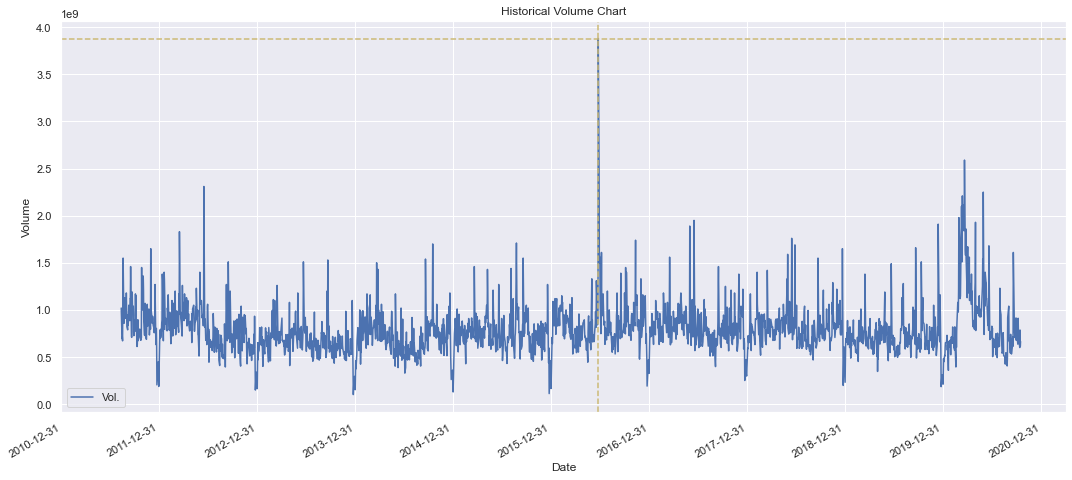

In [135]:
# make it bigger
rcParams['figure.figsize'] = 18,8

# plot
historical_vol.plot()

# labelling
plt.title('Historical Volume Chart')
plt.xlabel('Date')
plt.ylabel("Volume")

# x ticks
date_day = pd.date_range(start='2010-08-12', end='2021-10-15', freq='Y')
plt.xticks(date_day)

# horizontal and vertical line
plt.axhline(y=max_vol['Vol.'][0], color='y', linestyle='--')
plt.axvline(x=max_vol['Date'][0], color='y', linestyle='--')

plt.show()

#### What month is the price the highest of the year

In [136]:
per_month = historical_FTSE.groupby(['Month']).mean().reset_index()
per_month

,Month,Price,Open,High,Low,Vol.,Change %,Year
0,1,5938.003953,5941.402047,5977.467647,5900.656659,7.604087e+08,-0.057459,2010.522353
1,2,5917.639279,5918.167736,5953.681368,5879.598085,8.180693e+08,0.002687,2010.517413
2,3,5822.023449,5824.403542,5866.144653,5778.397523,9.386404e+08,-0.025949,2010.506944
3,4,5901.394433,5895.289421,5933.610378,5860.685164,8.268502e+08,0.122846,2010.488665
4,5,5964.860296,5965.437931,6002.620394,5926.326429,8.429388e+08,-0.005788,2010.470443
5,6,5887.908936,5891.361797,5928.814066,5850.321111,8.729252e+08,-0.058605,2010.546099
6,7,5873.702528,5871.406727,5911.319187,5833.943093,7.039049e+08,0.037269,2010.514673
7,8,5860.371324,5863.384610,5901.585532,5819.320071,7.051296e+08,-0.029314,2010.482270
8,9,5806.973991,5808.999155,5849.418850,5763.163451,7.933053e+08,-0.046761,2010.530516
9,10,5820.960161,5818.764977,5861.960760,5776.592028,7.848969e+08,0.058180,2010.255760


In [137]:
# change month from number to name
import calendar
per_month['Month'] = per_month['Month'].apply(lambda x: calendar.month_abbr[x])

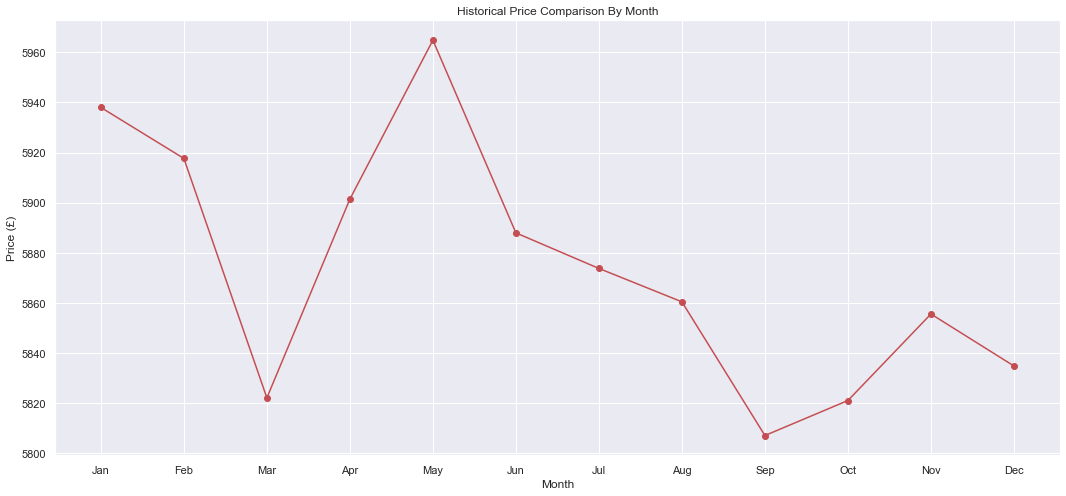

In [138]:
fig = plt.figure()
ax = plt.axes()

x = per_month['Month']
y = per_month['Price']


plt.plot(x, y, marker='o', color='r')

plt.title("Historical Price Comparison By Month")
plt.xlabel("Month")
plt.ylabel("Price (£)");

## Time Log

In [139]:
# create text file to log automation
file = open("time_log.txt", "a")
day = datetime.datetime.now()
file.write(f"Time: {day}\n")
file.close()